# Creating a high quality simulated transcriptomics data (where each feature comes from exactly the same distribution)

In [27]:
import random
import sklearn.metrics
import math
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

## Take a sequence, sort it, and produce a slightly distorted version of the sorted sequence

In [28]:
def partial_random(effect_sequence, intended_r2, reverse=False):
    effect_sequence = sorted(effect_sequence)
    if reverse:
        effect_sequence = effect_sequence[::-1]
    result = effect_sequence[:]
    count = 0
    while sklearn.metrics.r2_score(effect_sequence, result) > intended_r2:
        i = random.randint(0, len(effect_sequence) - 2)
        result[i], result[i + 1] = result[i + 1], result[i]
        count += 1
    return result

In [29]:
n_people = 30
n_genes = 2*10**3
n_active_genes = 200

In [30]:
MAL = sorted([np.random.randint(0, 1200) for i in range(n_people)])

In [31]:
X = np.matrix(np.random.normal(0, 1, size=(n_people, n_genes)))

## Select indices of active genes

In [32]:
genes_i = list(range(n_genes))
random.shuffle(genes_i)
active_genes = genes_i[:n_active_genes]

In [33]:
for i in active_genes:
    effect_sequence = X[..., i].reshape(n_people).tolist()[0]
    effect_sequence = partial_random(effect_sequence, 0.6, random.randint(0, 1))
    X[..., i] = np.array(effect_sequence).reshape(n_people, 1)

## Report MAL with an ISE

In [45]:
reported_MAL = [m + np.random.randint(-600, 600) for m in MAL]

In [46]:
def original_position(sequence):
    elements = sorted(list(zip(sequence, range(len(sequence)))))
    positions = [i[1] for i in elements]
    sorted_sequence = [i[0] for i in elements]
    return sorted_sequence, positions

In [47]:
sMAL, positions = original_position(reported_MAL)

In [48]:
sMAL == [reported_MAL[i] for i in positions]

True

In [49]:
actual_MAL = [MAL[i] for i in positions]

In [50]:
sorted(list(zip(reported_MAL, MAL))) == sorted(list(zip(sMAL, actual_MAL)))

True

In [51]:
X2 = np.vstack([X[i, ...] for i in positions])

In [52]:
X2

matrix([[ 1.54039741e+00,  8.96001159e-01, -1.42071561e+00, ...,
         -3.64763564e-01,  6.65060292e-01, -1.73603375e+00],
        [ 1.68491461e-01, -7.81172885e-01,  2.45681329e+00, ...,
         -5.65464265e-01,  1.07305975e-01, -2.19121669e+00],
        [-2.43378967e+00,  1.28650537e+00,  8.70695613e-01, ...,
         -5.85870307e-01, -3.35328765e-01, -7.35400597e-01],
        ...,
        [-7.61130747e-01,  1.18621019e-01,  5.79369144e-01, ...,
         -1.07050410e+00, -1.17659755e+00,  1.17681215e+00],
        [ 6.17030553e-01, -6.66066593e-02, -4.41792108e-01, ...,
          8.20716172e-01, -3.09113448e-01,  1.35860839e+00],
        [-1.21776287e+00, -2.03052882e+00,  1.36654778e-03, ...,
          2.07430156e+00,  1.14657129e+00,  2.93578832e-01]])

In [53]:
X2.shape

(30, 2000)

In [54]:
import sys

In [55]:
with open("generated_data", "w") as f:
    print("IDs", end="\t", file=f)
    for i in range(n_people):
        print("pid{}".format(i), end="\t", file=f)
    print("", file=f)
    print("ModalAllele", end="\t", file=f)
    for m in sMAL:
        print(m, end="\t", file=f)
    print(file=f)
    print("ActualMAL", end="\t", file=f)
    for a in actual_MAL:
        print(a, end="\t", file=f)
    print(file=f)
    print("Affymetrix", end="\t", file = f)
    for a in active_genes:
        print("id{}".format(a), end="\t", file=f)
    print(file=f)
    for i in range(n_genes):
        print("id{}".format(i), end = "\t", file=f)
        for elem in X2[..., i].flatten().tolist()[0]:
            print(elem, end = "\t", file=f)
        print(file=f)

# Debugging

In [19]:
results = []
for i in range(n_genes):
    r, p = scipy.stats.pearsonr(sMAL, X2[..., i].reshape(n_people).tolist()[0])
    results.append((p, r))

In [20]:
just_active = []
for i in active_genes:
    r, p = scipy.stats.pearsonr(sMAL, X2[..., i].reshape(n_people).tolist()[0])
    just_active.append((p, r))

In [21]:
just_active.sort()

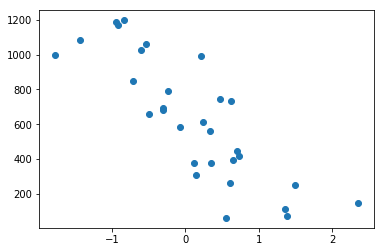

In [22]:
plt.scatter(X[..., active_genes[1]].reshape(-1).tolist()[0], actual_MAL)

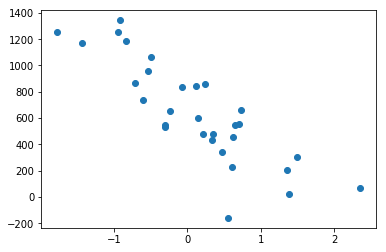

In [23]:
plt.scatter(X[..., active_genes[1]].reshape(-1).tolist()[0], reported_MAL)

In [24]:
just_active

[(3.5370835129503325e-10, -0.8718676963127268),
 (9.138368787377031e-10, -0.8622724592628433),
 (1.4126697576885226e-09, -0.8576140460070591),
 (3.6752400912950025e-09, -0.8467829420244106),
 (6.103294258402352e-09, -0.8406784195804029),
 (6.4150186559751475e-09, 0.8400648116580381),
 (9.127947224684963e-09, 0.8356459913681905),
 (1.7214075734986736e-08, -0.8273592122961843),
 (2.0447988375026628e-08, -0.8250323014306228),
 (2.130075173633953e-08, -0.8244750234735947),
 (2.270138583116024e-08, -0.8236025276860022),
 (2.897380752406082e-08, 0.8202157235054452),
 (2.9316094957442232e-08, 0.8200508900049035),
 (3.4937715892275085e-08, 0.8175688178286115),
 (3.852093445453065e-08, -0.8161711103055779),
 (3.963487890322732e-08, -0.8157607800583055),
 (4.668033696319824e-08, -0.8133861393216132),
 (4.7618461165667966e-08, 0.8130950543245277),
 (5.1974224393562766e-08, 0.8118086223794148),
 (5.410052637366872e-08, 0.8112160441078389),
 (5.449850197429316e-08, 0.811107501465054),
 (5.787814654

In [25]:
results.sort()

In [26]:
results[:100]

[(3.5370835129503325e-10, -0.8718676963127268),
 (9.138368787377031e-10, -0.8622724592628433),
 (1.4126697576885226e-09, -0.8576140460070591),
 (3.6752400912950025e-09, -0.8467829420244106),
 (6.103294258402352e-09, -0.8406784195804029),
 (6.4150186559751475e-09, 0.8400648116580381),
 (9.127947224684963e-09, 0.8356459913681905),
 (1.7214075734986736e-08, -0.8273592122961843),
 (2.0447988375026628e-08, -0.8250323014306228),
 (2.130075173633953e-08, -0.8244750234735947),
 (2.270138583116024e-08, -0.8236025276860022),
 (2.897380752406082e-08, 0.8202157235054452),
 (2.9316094957442232e-08, 0.8200508900049035),
 (3.4937715892275085e-08, 0.8175688178286115),
 (3.852093445453065e-08, -0.8161711103055779),
 (3.963487890322732e-08, -0.8157607800583055),
 (4.668033696319824e-08, -0.8133861393216132),
 (4.7618461165667966e-08, 0.8130950543245277),
 (5.1974224393562766e-08, 0.8118086223794148),
 (5.410052637366872e-08, 0.8112160441078389),
 (5.449850197429316e-08, 0.811107501465054),
 (5.787814654